Grafica sin logaritmos


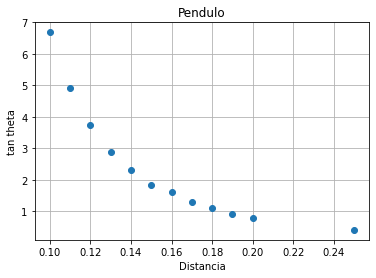

In [2]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import *
import numpy as np
import pandas as pd
import math
import csv
from math import log10,floor



class Minimos:
    def __init__(self,n,archivos,n_a,nombre_ejex,nombre_ejey):
        
        #------------------------------Declaración de variables que dan nombre a los ejes---------------------------------------

        
        self.nombre_ejex=nombre_ejex
        self.nombre_ejey=nombre_ejey
        
        #--------------------------Declaración de variables usadas para almacenamiento de datos--------------------------------

        
        self.archivos=archivos #Almacena en una tupla los nombres de cada archivo el cual cada uno tiene elementos
        self.n = n  #Almacena el número de elementos que tiene el archivos txt (número de datos)
        self.n_a = n_a #Almacena el número de elementos que hay en la tupla archivos
        
        self.datos_x = np.zeros((n_a,n)) #Crea matrices con ceros de tamaño #archivos x #datos
        self.datos_y = np.zeros((n_a,n))
        self.delta=[]
        
        #--------------------------------Declaración de variables usadas para MC----------------------------------------------
        
        self.x=[] #Almacenará los datos que se toman como valores de x para aplicar mínimos cuadrados
        self.xsinlog=[] #En caso de que se aplique el método de logaritmos entonces esta tupla almacenara los datos sin logaritmo
        #mientras que los self.x tendrán logaritmo
        self.y=[] #lo mismo pero para y
        self.ysinlog=[]
        
        self.m=0  #Almacenara la pendiente de la linealización
        self.b=0  #Almacenará la intersección de la linealización
        self.sm=0 #Almacenará el error en la pendiente
        self.sb=0 #Almacenraá el error en la intersección
        self.cc=0 #Almacenará el coeficiente de correlación de la linealización}}
        
        
    def Obtener_datos(self):
        for k,archivo in enumerate(self.archivos):  #k indica el numero del elemento del archivo y archivo almacena el nombre 
                                                    #almacena la cadena de texto del nombre del archivo
            data_txt = np.loadtxt(archivo+".txt")   #convierte el archivo de txt a csv para así poder usarlo
            data_txtDF = pd.DataFrame(data_txt)
            data_txtDF.to_csv(archivo+".csv",index=False)

            with open(archivo+".csv",newline="\n") as csvfile:
                reader = csv.reader(csvfile,delimiter=',') #Lee los datos del archivo csv

                l=0   #contador para el numero del elemento en qué está i o j
                h=0   #contador para evitar que se almacene el 0 y 1
                for i,j in reader:
                    if h != 0:  #para indicar que la primera iteración de i y j no debe ser almacenada
                        self.datos_x[k,l] = float(i)
                        self.datos_y[k,l] = float(j)
                        l+=1
                    h+=1
                    
    
    def Sacar_Logaritmos(self):
        for i in range(self.n):
            self.xsinlog.append(self.x[i])
            self.ysinlog.append(self.y[i])
            if self.x[i]!=0:
                self.x[i]=math.log(self.x[i])
            self.y[i]=math.log(self.y[i])

    def Minimos_cuadrados(self):
        y=0
        x=0
        x_2=0
        y_2=0
        xy=0
        for i in range(self.n):
            y = self.y[i]+y
            x = self.x[i]+x
            xy += self.x[i]*self.y[i]  #Obtiene cada uno de los términos que se necesitan para sacar mínimos cuadrados
            x_2+= self.x[i]**2
            y_2+= self.y[i]**2

        self.m = (self.n*xy-x*y)/(self.n*x_2-x**2)  #Obtiene la pendiente
        self.b = (y*x_2-x*xy)/(self.n*x_2-x**2) #Obtiene la intersección

        sy=0
        for i in range(self.n):
            sy+=((self.y[i]-(self.m*self.x[i]+self.b))**2)/(self.n-2) 
        sy = math.sqrt(sy)

        self.sm=sy*math.sqrt(self.n/(self.n*x_2-x**2)) #Obtiene el error de la pendiente
        self.sb=sy*math.sqrt(x_2/(self.n*x_2-x**2)) #Obtiene el error de la intersección
        self.cc = (self.n*xy-x*y)/(np.sqrt((self.n*x_2-x**2)*(self.n*y_2-y**2))) #Obtiene el coeficiente de correlación

            
    def Sacar_Promedio(self):
        if self.n_a != 1:
            for i in range(self.n):
                sumax=0
                sumay=0
                for j in range(self.n_a):
                    sumax += self.datos_x[j,i]
                    sumay += self.datos_y[j,i]

                self.x.append(sumax/self.n_a)
                self.y.append(sumay/self.n_a)
        else:
            for i in range(self.n):
                self.x.append(self.datos_x[0,i])
                self.y.append(self.datos_y[0,i])
            
    #------------------------------------Graficadores-------------------------------------------

        
        
    def Graficar_Recta(self,nombre_grafica): 
        self.nombre_grafica = nombre_grafica
        print(nombre_grafica)
        p=np.arange(self.x[0],self.x[self.n-1],0.1)
        plt.plot(self.x,self.y,'o')
        plt.plot(p,self.m*p+self.b)
        plt.xlabel(self.nombre_ejex)
        plt.ylabel(self.nombre_ejey)
        plt.title('Pendulo')
        plt.grid()
        plt.show()
        
        
    def Graficador(self,nombre_grafica):  #Este graficador grafica los datos que se tengan en las tuplas de self.y y self.x
        self.nombre_grafica = nombre_grafica
        print(nombre_grafica)

        plt.plot(self.x,self.y,"o")
        plt.xlabel(self.nombre_ejex)
        plt.ylabel(self.nombre_ejey) 
        plt.title('Pendulo')
        plt.grid()
        plt.show()
        
    def Graficador_Exp(self,nombre_grafica):
        self.nombre_grafica = nombre_grafica
        print(nombre_grafica)
        x=np.arange(self.xsinlog[0],self.xsinlog[-1],0.001)
        plt.plot(self.xsinlog,self.ysinlog,'o')
        plt.plot(x,np.e**self.b*x**self.m)
        plt.xlabel(self.nombre_ejex)
        plt.ylabel(self.nombre_ejey)
        plt.title('Pendulo')
        plt.grid()
        plt.show()
    #-------------------------------------------------------------------------------
              
    def Imprimir_datos(self):
        print("El valor de la pendiente es:",self.m)
        print("El valor de la intersección es:",self.b)
        
        print("\nLa ecuación de la recta es y={}x+{}".format(self.m,self.b))
        
        print("\nEl error de la pendiente es",self.sm)
        print("El error de la intersección es:",self.sb)
        print("El valor del coeficiente de correlación es:",self.cc)
        
        print("La ecuación de la exponencial es: y=e^({})x^({})".format(self.b,self.m))

        
    #----------------------Creación de archivos .txt con los datos para graficar en Gnu-Plot---------------------------------
    def Escribir_logaritmos(self): 
        for i in range(self.n):
            x = abs(0.02/self.ysinlog[i])
            self.delta.append(round(x,1-int(floor(log10(x)))-1))
        
        fichero1 = open("datos_con_log.txt", 'w')
        for i in range(self.n):
            fichero1.write('{0:3f} \t {1:3f} \t {2:3f} \t {3:4f}\n'.format(self.x[i], 0 ,  self.y[i], self.delta[i]))
    def Escribir_datos(self):
        fichero2 = open("datos_sin_log.txt","w")

        for i in range(self.n):
            fichero2.write('{0:3f} \t {1:3f} \t {2:3f} \t {3:4f}\n'.format(self.xsinlog[i], 0 ,  self.ysinlog[i], 0.01))
        


        
#Descripción: este programa sirve para linealizar un conjunto de datos por el metodo de:
# 1- minimos cuadrados
# 2- minimos cuadrados y logaritmos (log vs log)
#Para que funcione el programa tiene que haber un archivo de extensión .txt (bloc de notas) en la misma carpeta donde esté 
#el programa de tal forma que dentro del archivo estén los datos a analizar separados por un espacio " ", al termino de la
#ejecución del programa se harán una serie de gráficas y se creará un archivo .txt el cual contendrá los datos con logaritmos
#Actualmente está configurada para el caso 2-


Nombres=["datos"]    
nombre_ejex = "Distancia"
nombre_ejey = "tan theta"



p = Minimos(12,Nombres,len(Nombres),nombre_ejex,nombre_ejey)  #1-Número de datos del documento, 2-Tupla que contiene lo
#nombres de los archivos los cuales tienen datos a promediar, 3-Obtiene el numero de archivos que hay, 4-Nombre del eje x, 
# 5- Nombre del eje y

p.Obtener_datos()  #Almacena los datos del archivo txt para luego trabajarlos
p.Sacar_Promedio() #Obtiene el promedio de los datos, Nota: Si solo se trabaja con un archivo entonces esto no afecta en nada

p.Graficador("Grafica sin logaritmos")  
p.Sacar_Logaritmos()

Grafica con logaritmos


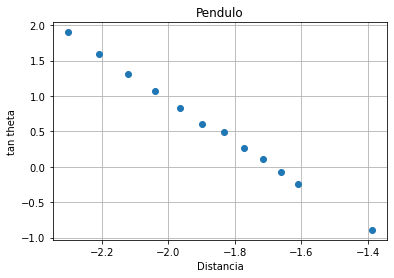

Grafica con log y recta


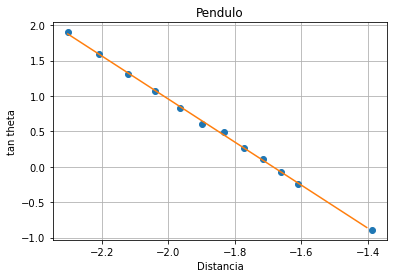

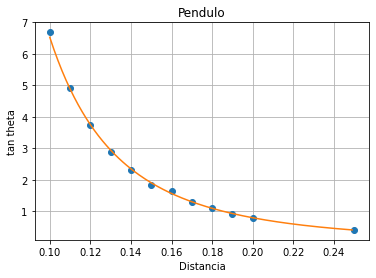

El valor de la pendiente es: -3.0372090047005544
El valor de la intersección es: -5.117107801364275

La ecuación de la recta es y=-3.0372090047005544x+-5.117107801364275

El error de la pendiente es 0.02514641017540073
El error de la intersección es: 0.04760442664926746
El valor del coeficiente de correlación es: -0.9996574299207032
La ecuación de la exponencial es: y=e^(-5.117107801364275)x^(-3.0372090047005544)


In [3]:
p.Graficador("Grafica con logaritmos")  

p.Minimos_cuadrados()



p.Graficar_Recta("Grafica con log y recta") 

p.Graficador_Exp("")
p.Escribir_logaritmos()

p.Imprimir_datos()
